In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_and_prep_image(filename, img_shape=150):

    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the image and resize to desired shape
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, [img_shape, img_shape])

    # Scale pixel values between 0 and 1 if necessary
    img = img / 255.0
    return img

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import numpy as np # linear algebra
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:28<00:00, 102MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [ ]:


test_path="/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test"



In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

data_path = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
train_path = '/root/train'
valid_path = '/root/valid'

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)


In [ ]:
# Get the list of subdirectories (disease classes)
disease_classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

# Iterate over each class directory
for class_name in disease_classes:
    class_path = os.path.join(data_path, class_name)
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    # Check if image_files list is empty
    if not image_files:
        print(f"No image files found in {class_path}.")
        continue

    # Split the files into training and testing sets
    train_files, valid_files = train_test_split(image_files, test_size=0.2, random_state=42)

    # Create directories for each class in train and test sets
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(valid_path, class_name), exist_ok=True)

    # Move the files to their respective directories
    for file_name in train_files:
        shutil.copy(os.path.join(class_path, file_name), os.path.join(train_path, class_name, file_name))

    for file_name in valid_files:
        shutil.copy(os.path.join(class_path, file_name), os.path.join(valid_path, class_name, file_name))

    print(f"Processed {class_name}: {len(train_files)} train files, {len(valid_files)} valid files.")

No image files found in /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/train.
Processed Potato___healthy: 364 train files, 92 valid files.
Processed Apple___Apple_scab: 403 train files, 101 valid files.
Processed Tomato___Early_blight: 384 train files, 96 valid files.
Processed Grape___Black_rot: 377 train files, 95 valid files.
Processed Apple___Black_rot: 397 train files, 100 valid files.
Processed Apple___healthy: 401 train files, 101 valid files.
Processed Tomato___Target_Spot: 365 train files, 92 valid files.
Processed Soybean___healthy: 404 train files, 101 valid files.
Processed Apple___Cedar_apple_rust: 352 train files, 88 valid files.
Processed Potato___Early_blight: 388 train files, 97 valid files.
Processed Tomato___Leaf_Mold: 376 train files, 94 valid files.
Processed Corn_(maize)___healthy: 372 train files, 93 valid files.
Processed Tomato___Septoria_leaf_spot

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(test_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['AppleCedarRust1.JPG' 'AppleCedarRust2.JPG' 'AppleCedarRust3.JPG'
 'AppleCedarRust4.JPG' 'AppleScab1.JPG' 'AppleScab2.JPG' 'AppleScab3.JPG'
 'CornCommonRust1.JPG' 'CornCommonRust2.JPG' 'CornCommonRust3.JPG'
 'PotatoEarlyBlight1.JPG' 'PotatoEarlyBlight2.JPG'
 'PotatoEarlyBlight3.JPG' 'PotatoEarlyBlight4.JPG'
 'PotatoEarlyBlight5.JPG' 'PotatoHealthy1.JPG' 'PotatoHealthy2.JPG'
 'TomatoEarlyBlight1.JPG' 'TomatoEarlyBlight2.JPG'
 'TomatoEarlyBlight3.JPG' 'TomatoEarlyBlight4.JPG'
 'TomatoEarlyBlight5.JPG' 'TomatoEarlyBlight6.JPG' 'TomatoHealthy1.JPG'
 'TomatoHealthy2.JPG' 'TomatoHealthy3.JPG' 'TomatoHealthy4.JPG'
 'TomatoYellowCurlVirus1.JPG' 'TomatoYellowCurlVirus2.JPG'
 'TomatoYellowCurlVirus3.JPG' 'TomatoYellowCurlVirus4.JPG'
 'TomatoYellowCurlVirus5.JPG' 'TomatoYellowCurlVirus6.JPG']


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# Function to count files in a directory
def count_files_in_directory(directory):
    file_count = 0
    for root, dirs, files in os.walk(directory):
        file_count += len(files)
    return file_count

# Function to display a random image from each class
def display_random_images_from_each_class(directory):
    disease_classes = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    for class_name in disease_classes:
        class_path = os.path.join(directory, class_name)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        if image_files:
            random_image = random.choice(image_files)
            image_path = os.path.join(class_path, random_image)

            # Display the image
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
            plt.show()

# Display random images from each disease class in the training dataset
display_random_images_from_each_class(train_path)

Output hidden; open in https://colab.research.google.com to view.

Potato___healthy: 364 files
Apple___Apple_scab: 403 files
Tomato___Early_blight: 384 files
Grape___Black_rot: 377 files
Apple___Black_rot: 397 files
Apple___healthy: 401 files
Tomato___Target_Spot: 365 files
Soybean___healthy: 404 files
Apple___Cedar_apple_rust: 352 files
Potato___Early_blight: 388 files
Tomato___Leaf_Mold: 376 files
Corn_(maize)___healthy: 372 files
Tomato___Septoria_leaf_spot: 348 files
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 328 files
Corn_(maize)___Northern_Leaf_Blight: 381 files
Strawberry___Leaf_scorch: 355 files
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 392 files
Strawberry___healthy: 364 files
Grape___Esca_(Black_Measles): 384 files
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 344 files
Pepper,_bell___Bacterial_spot: 382 files
Tomato___Tomato_mosaic_virus: 358 files
Tomato___Bacterial_spot: 340 files
Tomato___Late_blight: 370 files
Raspberry___healthy: 356 files
Cherry_(including_sour)___healthy: 364 files
Cherry_(including_sour)___Powdery_mildew: 336 

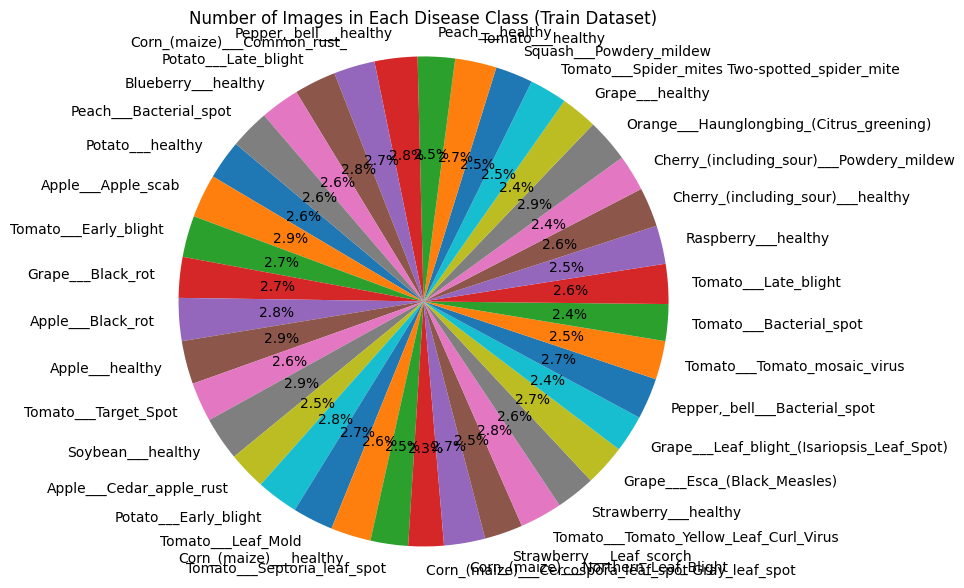

In [ ]:
import os
import matplotlib.pyplot as plt


# Function to count files in a directory
def count_files_in_directory(directory):
    file_count = 0
    for root, dirs, files in os.walk(directory):
        file_count += len(files)
    return file_count

# Function to get the number of images in each class
def get_image_counts(directory):
    disease_classes = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    image_counts = {}
    for class_name in disease_classes:
        class_path = os.path.join(directory, class_name)
        num_files = count_files_in_directory(class_path)
        image_counts[class_name] = num_files
    return image_counts

# Function to plot a pie chart
def plot_pie_chart(data, title):
    labels = data.keys()
    sizes = data.values()
    plt.figure(figsize=(10, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    plt.show()

# Get the number of images in each class
image_counts = get_image_counts(train_path)

# Check that each class contains at least one image
for class_name, count in image_counts.items():
    if count < 1:
        print(f"Warning: {class_name} contains no images.")
    else:
        print(f"{class_name}: {count} files")

# Plot the pie chart
plot_pie_chart(image_counts, 'Number of Images in Each Disease Class (Train Dataset)')

In [ ]:
for item in data_dir.glob('*'):
    print(item.name)


AppleCedarRust4.JPG
PotatoEarlyBlight5.JPG
TomatoYellowCurlVirus5.JPG
TomatoYellowCurlVirus1.JPG
PotatoHealthy2.JPG
TomatoYellowCurlVirus4.JPG
AppleCedarRust3.JPG
CornCommonRust1.JPG
PotatoEarlyBlight4.JPG
TomatoEarlyBlight3.JPG
AppleScab2.JPG
TomatoEarlyBlight1.JPG
TomatoHealthy1.JPG
PotatoEarlyBlight1.JPG
PotatoEarlyBlight3.JPG
PotatoHealthy1.JPG
TomatoHealthy2.JPG
TomatoHealthy3.JPG
AppleScab1.JPG
CornCommonRust3.JPG
AppleCedarRust1.JPG
TomatoYellowCurlVirus6.JPG
CornCommonRust2.JPG
TomatoYellowCurlVirus2.JPG
AppleCedarRust2.JPG
TomatoEarlyBlight2.JPG
TomatoEarlyBlight6.JPG
TomatoEarlyBlight5.JPG
TomatoEarlyBlight4.JPG
TomatoYellowCurlVirus3.JPG
PotatoEarlyBlight2.JPG
TomatoHealthy4.JPG
AppleScab3.JPG


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for the test set
valid_datagen = ImageDataGenerator(rescale=1./255)

# Training set generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Test set generator
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Found 14045 images belonging to 38 classes.
Found 3527 images belonging to 38 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,309,542 (12.62 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 140s 176ms/step - accuracy: 0.1198 - loss: 3.3182 - val_accuracy: 0.4440 - val_loss: 1.9279
Epoch 2/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 76s 171ms/step - accuracy: 0.3731 - loss: 2.1743 - val_accuracy: 0.5832 - val_loss: 1.3440
Epoch 3/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 75s 169ms/step - accuracy: 0.4989 - loss: 1.6632 - val_accuracy: 0.6742 - val_loss: 1.1029
Epoch 4/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 80s 165ms/step - accuracy: 0.5737 - loss: 1.3959 - val_accuracy: 0.6876 - val_loss: 0.9754
Epoch 5/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 74s 167ms/step - accuracy: 0.6356 - loss: 1.1842 - val_accuracy: 0.7695 - val_loss: 0.7075
Epoch 6/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 83s 167ms/step - accuracy: 0.6778 - loss: 1.0643 - val_accuracy: 0.7774 - val_loss: 0.6975
Epoch 7/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 80s 164ms/step - accuracy: 0.7094 - loss: 0.9241 - val_accuracy: 0.8129 - val_loss: 0.6122
Epoch 8/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 164ms/step - accuracy: 0.7198 - loss: 0.8818 - va

In [ ]:

# Evaluate the model
loss, accuracy = model.evaluate(valid_generator)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Save the model
model.save('my_model_2.keras')

111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9129 - loss: 0.2951
Test Accuracy: 91.30%


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, precision_score, accuracy_score
import matplotlib.pyplot as plt


# Only rescaling for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Test set generator
test_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32,           # Number of images to yield per batch
    class_mode='categorical',
    shuffle=False  # Important to keep the order for prediction
)

# Load the trained model
model = tf.keras.models.load_model('my_model.keras')

# Make predictions on the test data
test_generator.reset()  # Reset the generator for accurate predictions
predictions = model.predict(test_generator, verbose=1)

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get the class labels for the predicted classes
predicted_labels = [class_labels[i] for i in predicted_classes]
true_labels = [class_labels[i] for i in true_classes]

Found 3527 images belonging to 38 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step


In [ ]:
# Calculate precision and accuracy
precision = precision_score(true_classes, predicted_classes, average='weighted')
accuracy = accuracy_score(true_classes, predicted_classes)

print(f'Precision: {precision:.2f}')
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Precision: 0.92
Accuracy: 0.91
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.85      0.89       101
                                 Apple___Black_rot       0.86      0.99      0.92       100
                          Apple___Cedar_apple_rust       0.95      1.00      0.97        88
                                   Apple___healthy       0.89      0.84      0.87       101
                               Blueberry___healthy       0.99      0.95      0.97        91
          Cherry_(including_sour)___Powdery_mildew       0.93      0.95      0.94        85
                 Cherry_(including_sour)___healthy       0.97      0.98      0.97        92
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.84      0.82      0.83        82
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98        96
               Corn_(maize)___Northern_Leaf_Blig

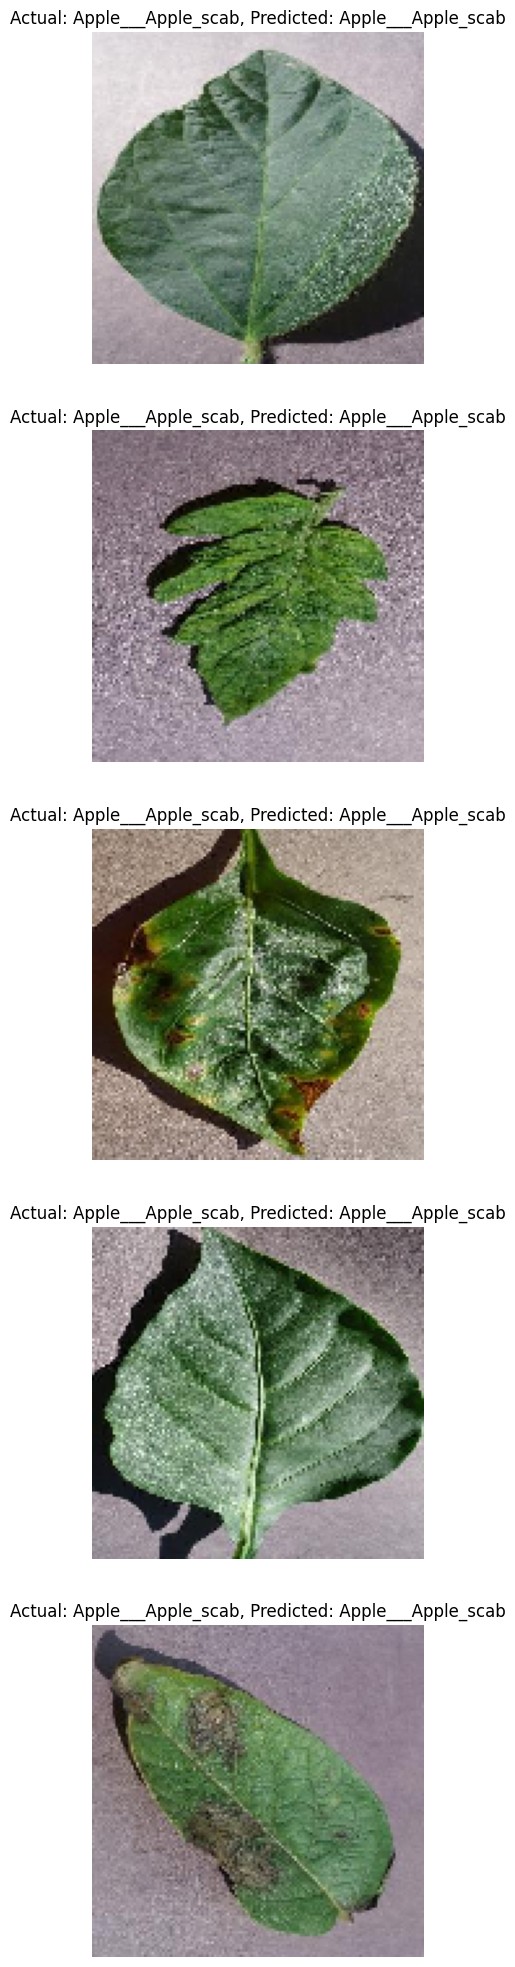

In [ ]:
# Function to display images with predicted and actual labels
def display_predictions(generator, true_labels, predicted_labels, class_labels, num_images=5):
    # Get a batch of images and their corresponding labels
    images, _ = next(generator)

    plt.figure(figsize=(15, 25))
    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(images[i])
        plt.title(f"Actual: {true_labels[i]}, Predicted: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()

# Reset the test generator and display predictions
valid_generator.reset()
display_predictions(valid_generator, true_labels, predicted_labels, class_labels, num_images=5)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('my_model_2.keras')

In [ ]:
# Function to preprocess the image
def preprocess_image(image_path, target_size=(128, 128)):
    # Load the image
    img = load_img(image_path, target_size=target_size)
    # Convert the image to an array
    img_array = img_to_array(img)
    # Rescale pixel values
    img_array = img_array / 255.0
    # Expand dimensions to match the model input shape
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [ ]:
# Function to predict the class of an image
def predict_image_class(image_path, model, class_labels):
    # Preprocess the image
    img_array = preprocess_image(image_path)
    # Make predictions
    predictions = model.predict(img_array)
    # Get the index of the highest probability class
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    # Get the class label
    predicted_class_label = class_labels[predicted_class_idx]
    return predicted_class_label

In [ ]:
# Example class labels (you should replace this with your actual class labels)
class_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust',
 'Apple___healthy' ,'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy', 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot',
 'Peach___healthy', 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy','Potato___Early_blight', 'Potato___Late_blight',
 'Potato___healthy', 'Raspberry___healthy' ,'Soybean___healthy',
 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight',
 'Tomato___Late_blight', 'Tomato___Leaf_Mold' ,'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

# Path to the image you want to predict
image_path = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/AppleCedarRust4.JPG'  # Update with your actual image path

# Predict the class of the image
predicted_class_label = predict_image_class(image_path, model, class_labels)

print(f'The predicted class of the image is: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted class of the image is: Apple___Cedar_apple_rust


In [ ]:
import os


# Iterate through all files and subfolders
for root, dirs, files in os.walk(test_path):
    for file in files:
        # Print the full path of each file
        print(os.path.join(root, file))


/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/AppleCedarRust4.JPG
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/PotatoEarlyBlight5.JPG
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/TomatoYellowCurlVirus5.JPG
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/TomatoYellowCurlVirus1.JPG
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/PotatoHealthy2.JPG
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/TomatoYellowCurlVirus4.JPG
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/AppleCedarRust3.JPG
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/CornCommonRust1.JPG
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/PotatoE

In [ ]:
# Function to preprocess image
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)  # Load image
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    return tf.expand_dims(img_array, axis=0)  # Add batch dimension

# Function to predict the class of a single image
def predict_image_class(image_path, model, class_labels):
    img = preprocess_image(image_path)
    predictions = model.predict(img)  # Predict
    predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]  # Get class index
    return class_labels[predicted_class_index]

# Path to the folder containing images
folder_path = test_path  # Update with your folder path
#
model = tf.keras.models.load_model('my_model_2.keras')  # Update model path

# Iterate through the folder and predict
results = []
for file in os.listdir(folder_path):
    if file.endswith(('.JPG', '.jpeg', '.png')):  # Filter image files
        image_path = os.path.join(folder_path, file)
        predicted_label = predict_image_class(image_path, model, class_labels)
        results.append({'Image Path': image_path, 'Predicted Class': predicted_label})

# Convert results to a DataFrame for tabular representation
results_df = pd.DataFrame(results)

# Print the DataFrame
results_df



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

,Image Path,Predicted Class
0,/root/.cache/kagglehub/datasets/vipoooool/new-...,Apple___Cedar_apple_rust
1,/root/.cache/kagglehub/datasets/vipoooool/new-...,Potato___Early_blight
2,/root/.cache/kagglehub/datasets/vipoooool/new-...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
3,/root/.cache/kagglehub/datasets/vipoooool/new-...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
4,/root/.cache/kagglehub/datasets/vipoooool/new-...,Potato___healthy
5,/root/.cache/kagglehub/datasets/vipoooool/new-...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
6,/root/.cache/kagglehub/datasets/vipoooool/new-...,Apple___Cedar_apple_rust
7,/root/.cache/kagglehub/datasets/vipoooool/new-...,Corn_(maize)___Common_rust_
8,/root/.cache/kagglehub/datasets/vipoooool/new-...,Potato___Early_blight
9,/root/.cache/kagglehub/datasets/vipoooool/new-...,Tomato___Tomato_Yellow_Leaf_Curl_Virus


No charts were generated by quickchart


In [ ]:
# Optionally save the results to a CSV file
results_df.to_csv('image_predictions.csv', index=False)